In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode


warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# EDA (Exploratory Data Analysis)

In [4]:
target = train.Survived

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Name	Description
Survived : Survived (1) or died (0)  
Pclass :Passenger's class  
Name : Passenger's name  
Sex : Passenger's sex  
Age : Passenger's age  
SibSp : Number of siblings/spouses aboard  
Parch : Number of parents/children aboard  
Ticket : Ticket number  
Fare : Fare  
Cabin : Cabin  
Embarked : Port of embarkation  

In [7]:
print(f'Unique Values in Pclass :{train.Pclass.unique()}')
print(f'Unique Values in SibSp :{train.SibSp.unique()}')
print(f'Unique Values in Embarked :{train.Embarked.unique()}')

Unique Values in Pclass :[3 1 2]
Unique Values in SibSp :[1 0 3 4 2 5 8]
Unique Values in Embarked :['S' 'C' 'Q' nan]


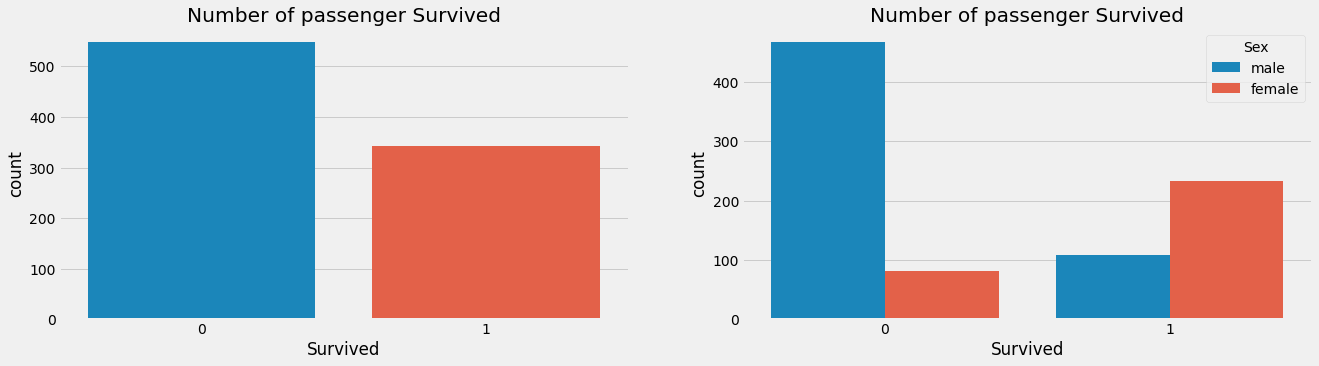

In [8]:
# countplot
# Show the counts of observations in each categorical bin using bars
# x, y (have to choose one between them) : x or y variable (column) to count
# hue : column name for colour encoding

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(train.Survived)
plt.title('Number of passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived');

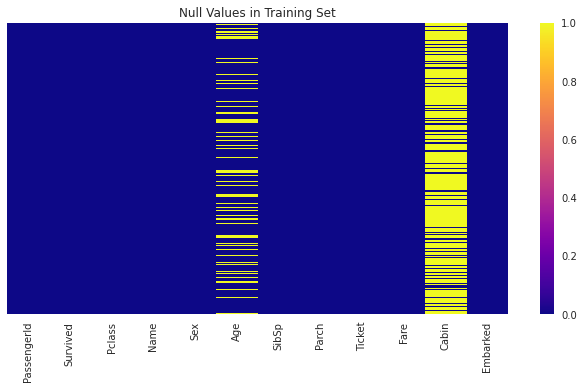

In [9]:
# heatmap
# Plot rectangular data as a color-encoded matrix
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

Text(0.5, 1.0, 'Number of passenger Survived')

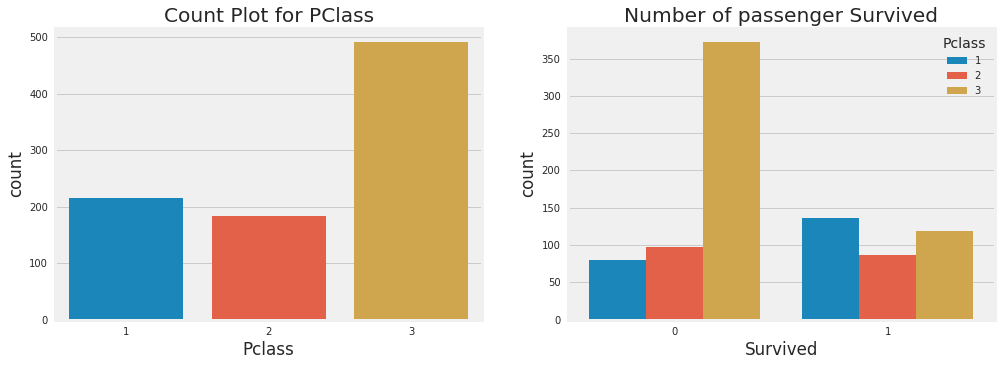

In [10]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived')

In [11]:
# values : Return a Numpy representation of the DataFrame.
# value_counts : Return a Series containing counts of unique values.
# normalize=True : the object returned will contain the relative frequencies of the unique values.
pclass1 = train[train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = train[train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = train[train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Lets look at some satistical data!\n")
print("Pclaas-1: {:.1f}% People Survived".format(pclass1))
print("Pclaas-2: {:.1f}% People Survived".format(pclass2))
print("Pclaas-3: {:.1f}% People Survived".format(pclass3))

Lets look at some satistical data!

Pclaas-1: 63.0% People Survived
Pclaas-2: 47.3% People Survived
Pclaas-3: 24.2% People Survived


<AxesSubplot:ylabel='Frequency'>

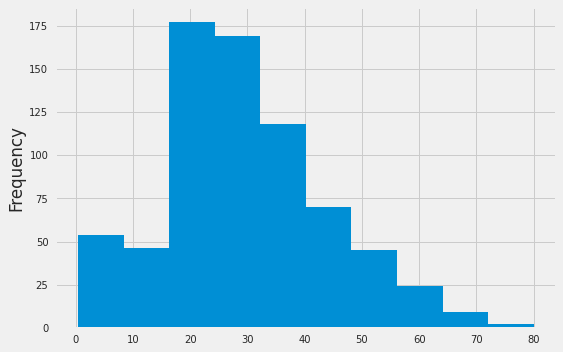

In [12]:
# Pandas Dataframe plot method
train['Age'].plot(kind='hist')

Text(0.5, 1.0, 'Age Distribution')

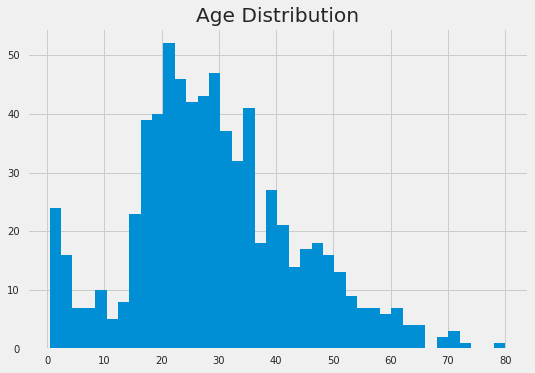

In [13]:
# You can call hist, instead of giving 'kind' argument
train['Age'].hist(bins=40)
plt.title('Age Distribution')

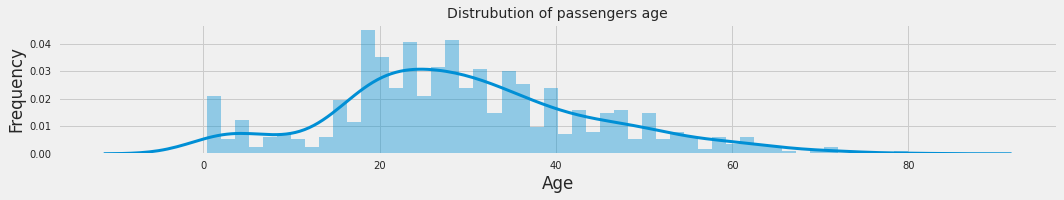

In [14]:
# Age column has non-uniform data and many outliers
# Outlier : An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train[(train["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age', fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

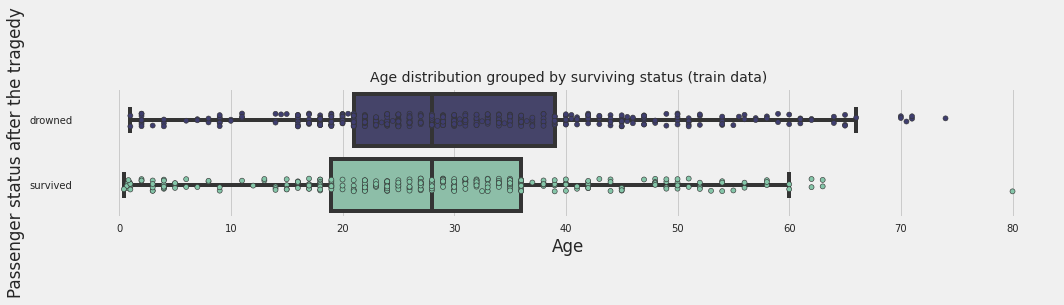

In [15]:
# Age by surviving status
# Did age had a big influence on chances to survive? To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
# Draw a scatterplot where one variable is categorical.
# A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases 
# where you want to show all observations along with some representation of the underlying distribution.
sns.stripplot(y = 'Survived', x = 'Age', data = train,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)', fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

Text(0.5, 1.0, 'Number of passenger Survived')

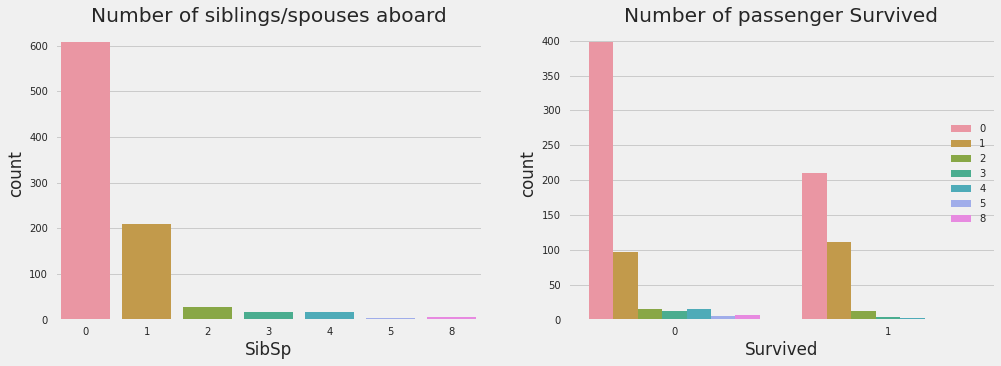

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['SibSp'])
plt.title('Number of siblings/spouses aboard')

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived')

Text(0.5, 1.0, 'Number of passenger Survived')

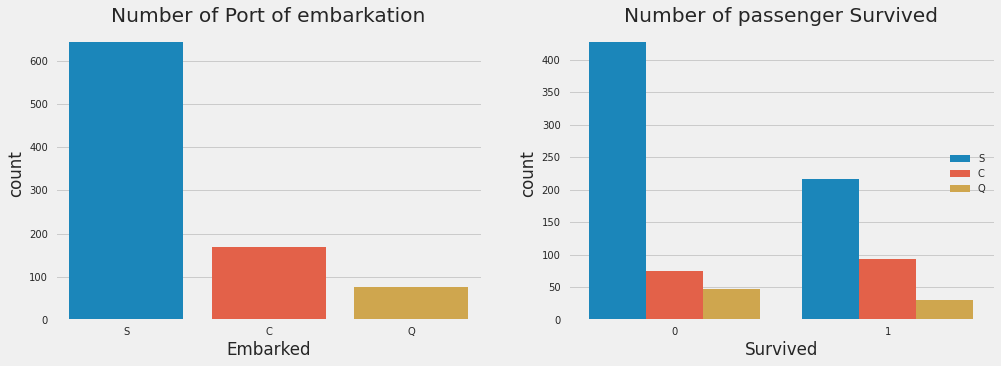

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of embarkation')

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived')

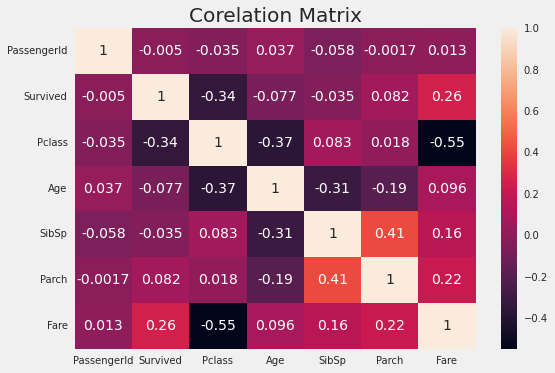

In [18]:
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

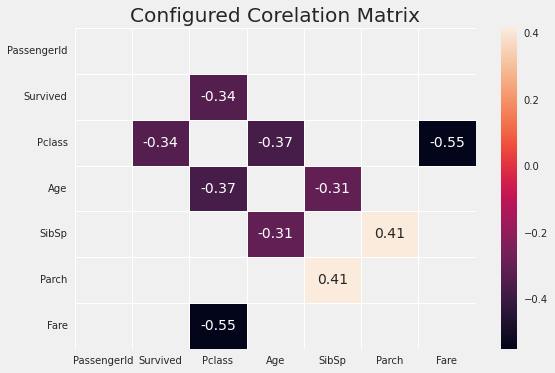

In [19]:
# Nan value doesn't show up in heatmap
corr = train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

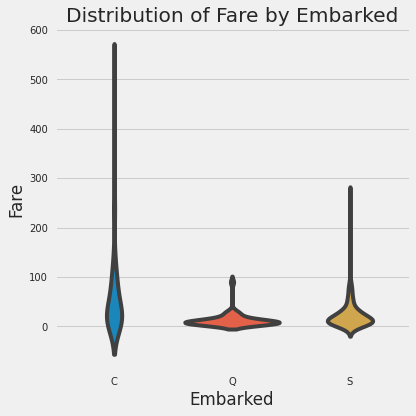

In [20]:
# This function provides access to several axes-level functions 
# that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 
# The kind parameter selects the underlying axes-level function to use:

# Categorical scatterplots:
#   stripplot() (with kind="strip"; the default)
#   swarmplot() (with kind="swarm")

# Categorical distribution plots:
#   boxplot() (with kind="box")
#   violinplot() (with kind="violin")
#   boxenplot() (with kind="boxen")

# Categorical estimate plots:
#   pointplot() (with kind="point")
#   barplot() (with kind="bar")
#   countplot() (with kind="count")

### violin plot ###
# Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. 
# In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=train, height = 6, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

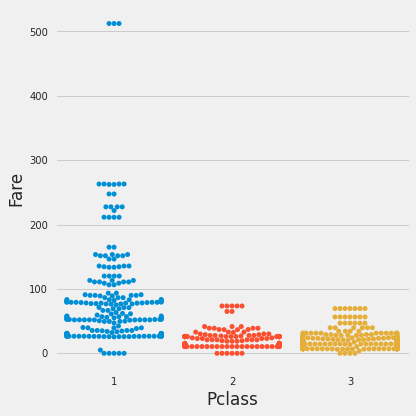

In [21]:
# Swarm plot is very similar to strip plot except the fact that the position of samples are adjusted to avoid overlapping.
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train, height = 6)
plt.tight_layout()

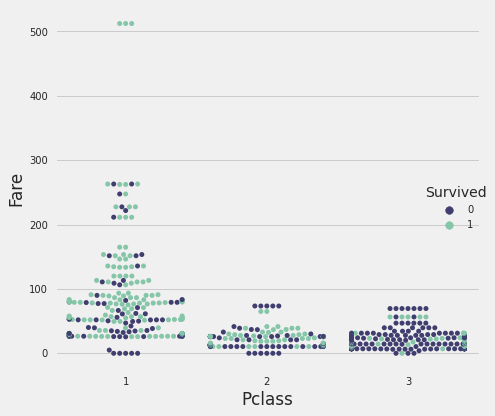

In [22]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=train, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

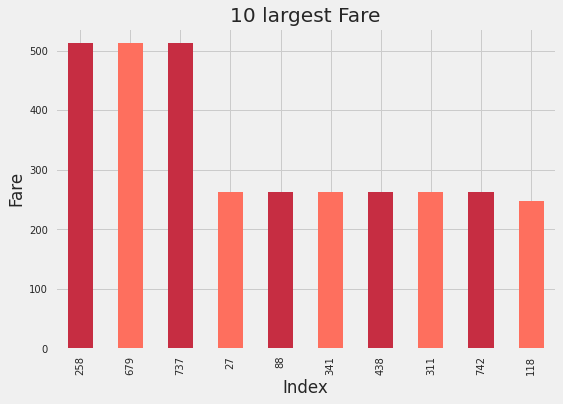

In [23]:

# colors are repeated
train['Fare'].nlargest(10).plot(kind='bar', title = '10 largest Fare', color = ['#C62D42', '#FE6F5E']);
plt.xlabel('Index')
plt.ylabel('Fare');

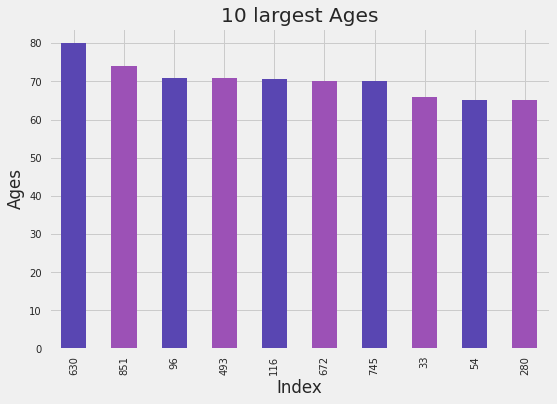

In [24]:
train['Age'].nlargest(10).plot(kind='bar', color = ['#5946B2','#9C51B6']);
plt.title('10 largest Ages')
plt.xlabel('Index')
plt.ylabel('Ages');

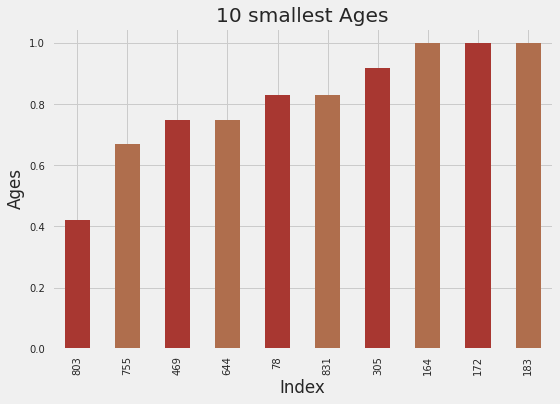

In [25]:
train['Age'].nsmallest(10).plot(kind='bar', color = ['#A83731','#AF6E4D'])
plt.title('10 smallest Ages')
plt.xlabel('Index')
plt.ylabel('Ages');

# Handle Missing Values

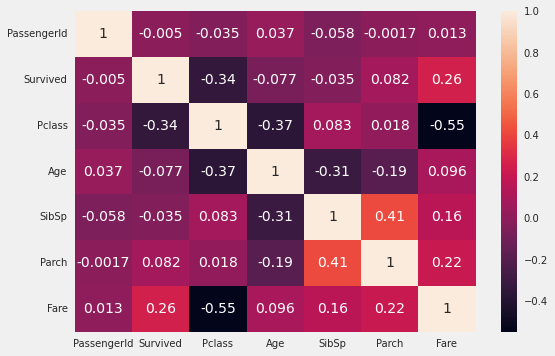

In [26]:
sns.heatmap(train.corr(), annot=True)
# one of the effectitve way to fill the null values is by finding correlation
# Same thing for test set

# .loc series assignment -> only records (?) of matched indexes are assigned
# https://stackoverflow.com/questions/69954697/why-does-loc-assignment-with-two-sets-of-brackets-result-in-nan-in-a-pandas-dat
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [27]:
# Return the single most common data point from discrete or nominal data.
# Applying the same technique for test set
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))

In [28]:
# Fare has the largest correlation with Pclass
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [29]:
# Make new value for unknown Cabin
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# Feature Engineering

In [30]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [31]:
# Sex is categorical data so we can replace male to 0 and femail to 1
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

In [32]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
# TODO : a very way to create columns for one_hot_encoding and drop original columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [34]:
# Transform Cabin information into its first initial
# group() returns one or more subgroups of the match. 
# If there is a single argument, the result is a single string; 
# if there are multiple arguments, the result is a tuple with one item per argument. 
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [35]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

In [36]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [37]:
# extract groups by a given regex for string series.
# https://github.com/pandas-dev/pandas/blob/v1.3.5/pandas/core/strings/accessor.py#L2314-L2440
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [38]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [39]:
# Different from pandas.Series.str.replace()
# Replace values given in to_replace with value.
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [40]:
train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

In [41]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

In [42]:
# Merge SibSp + Parch into Family
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

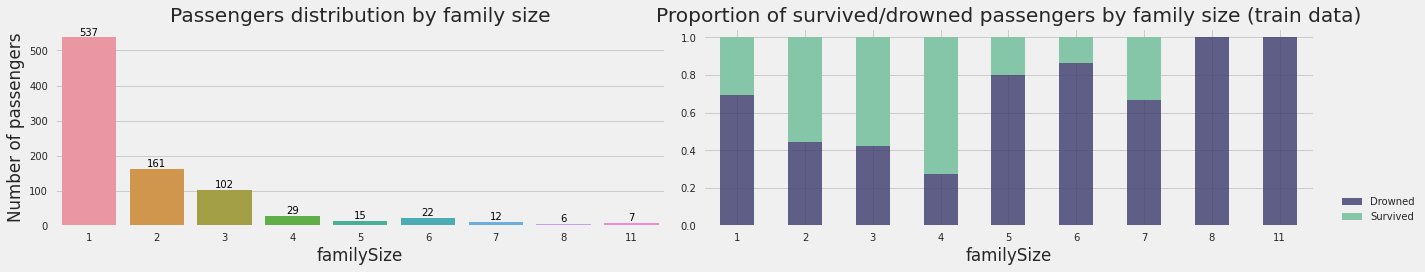

In [43]:
# Understanding figure, axes in matplotlib
# https://stackoverflow.com/questions/35677767/understanding-matplotlib-plt-figure-axarr
fig = plt.figure(figsize = (20,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(train['familySize'], ax = ax1)

# calculate passengers for each category
labels = train['familySize'].value_counts().sort_index()
# # add result numbers on barchart
height = 6
for i, v in enumerate(labels):
    ax.text(i, v+height, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
# https://medium.com/swlh/reshaping-in-pandas-with-stack-and-unstack-functions-bb169f64467d
# "train.groupby('familySize')['Survived'].value_counts(normalize = True)" this part yields multi indexes dataframe (familySize, Survived)
# Then, unstacking shift innermost row index (Survived) to innermost column index
d = train.groupby('familySize')['Survived'].value_counts(normalize = True).sort_index().unstack()

# If stacked is True, it generates stacked bar plot using column indexes of the dataframe
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', legend='reverse', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

# PCA(Principle component analysis)

In [44]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [45]:
columns = train.columns[2:]
columns

Index([    'Pclass',        'Sex',        'Age',       'Fare',      'Cabin',
                'S',          'C',          'Q',            0,            1,
                  2,            3,            4, 'familySize'],
      dtype='object')

Text(0, 0.5, 'Second Principal Component')

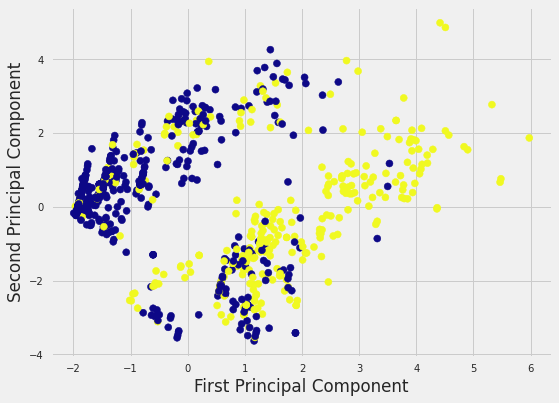

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

columns = train.columns[2:]
X_train = StandardScaler().fit_transform(train.drop(columns=["PassengerId","Survived"]))

new_df = pd.DataFrame(X_train, columns=columns)

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(new_df)

plt.figure(figsize =(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c = target, cmap ='plasma')
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Save preprocessed data


In [48]:
import pickle

pickle.dump(train, open('./data/preprocessed_train', 'wb'))
pickle.dump(test, open('./data/preprocessed_test', 'wb'))